In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

features = ["Sex", "Length", "Diameter continuous","Height",
    "Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
    
df_data = pd.read_csv("C:/Users/a/Downloads/abalone.data")
df_data = df_data.to_numpy()
df = pd.DataFrame(df_data, columns=features)
df.head()

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
1,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
2,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
3,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
4,I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8


In [27]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Sex,Length,Diameter continuous,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7


In [28]:
X = df.drop("Shell weight", axis=1)
y = df["Shell weight"]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(300, activation = 'relu', input_shape = (8,)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mae', metrics = ['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               2700      
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 83,101
Trainable params: 83,101
Non-trainable params: 0
_________________________________________________________________


In [30]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 60.4001 - mae: 60.4001 - val_loss: 52.9565 - val_mae: 52.9565
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 45.2052 - mae: 45.2052 - val_loss: 46.8103 - val_mae: 46.8103
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 41.4549 - mae: 41.4549 - val_loss: 40.0712 - val_mae: 40.0712
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 39.8014 - mae: 39.8014 - val_loss: 41.8223 - val_mae: 41.8223
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 37.9180 - mae: 37.9180 - val_loss: 35.2430 - val_mae: 35.2430
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 37.3062 - mae: 37.3062 - val_loss: 40.8167 - val_mae: 40.8167
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 35.5455 - mae: 35.5455 - val_loss: 29.1169 - val_mae: 29.1169
Epoch 8/100
105/105 [====================

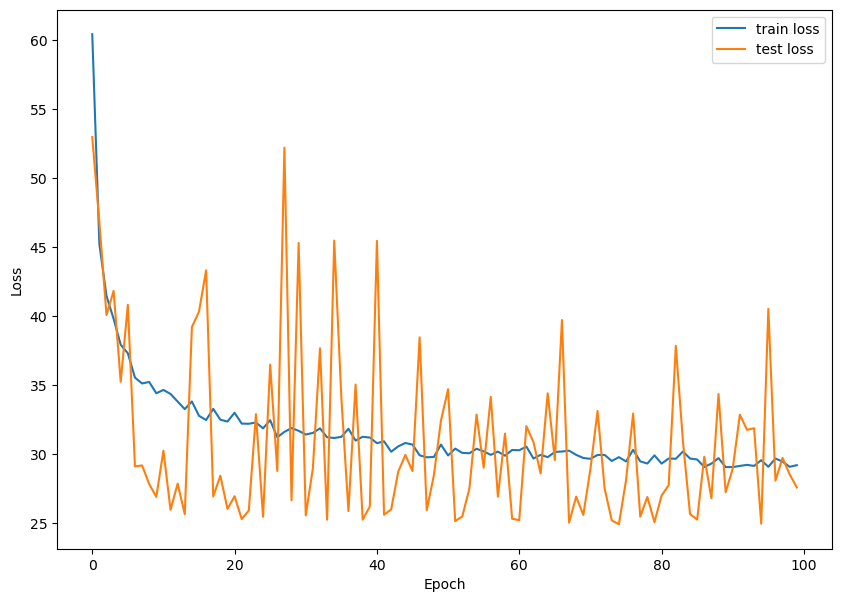

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

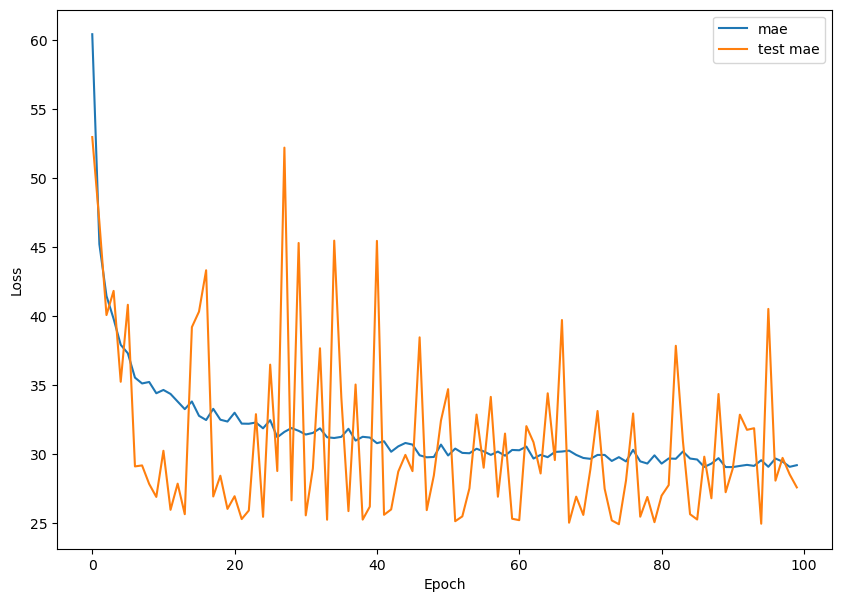

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 27.5986 - mae: 27.5986
